# [Homework] Gaussian Mixture Model (GMM)
*Jae Yun JUN KIM August 20, 2019*

## 1 Tasks

### 1. Implement yourself the GMM algorithm for Example 1 (density estimation for a Gaussian mixture) given in the Lab 3 document.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import random as rand
from scipy.stats import norm
import math

##### 1. Partie Cours

##### 2. Partie code

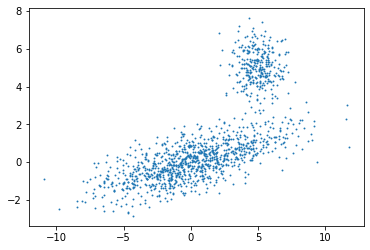

Number of training examples :  1300
Number of Gaussian Distribution :  2


In [2]:
n_samples = 300

# generate random sample, two components
# np.random.seed(0)
# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(300, 2) + np.array([5, 5])

# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(1000, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

plt.scatter(X_train[:, 0], X_train[:, 1], .8)
plt.show()

dataset = X_train
print("Number of training examples : ", np.size(dataset, 0))
print("Number of Gaussian Distribution : ", np.size(dataset, 1))

In [0]:
class GMM():
  def __init__(self, dataset):

      self.N = np.size(dataset,0)
      self.K = np.size(dataset,1)
      self.mu = np.zeros((self.K, self.K))

      self.dataset = dataset

      for k in range(self.K):
        val = rand.randrange(self.N) 
        for j in range(self.K):
            self.mu[k][j] += dataset[val][j]
        
      sigma1 = [[1, 0],[0, 1]]
      sigma2 = [[2, 0],[0, 2]]
      self.sigma = np.array([sigma1, sigma2])

      rdm_val = rand.uniform(0, 1) 
      self.phi = [rdm_val, (1-rdm_val)]
    
      print("init mu ", self.mu)
      print("init sigma ", self.sigma)
      print("init phi", self.phi)


  def gaussian(self, x, mu, sigma):
    #compute the pdf of the multi-var gaussian
    N = len(x)

    if (N == len(mu)) and ((N, N) == sigma.shape):
        det = np.linalg.det(sigma)

        if det == 0:
            raise NameError("The covariance matrix can't be singular")
        
        norm_factor = ((2*np.pi)**(float(N)/2))*abs(det)**(0.5)
        norm_factor = 1/(norm_factor)

        inv = np.linalg.inv(sigma)
        x_mu = (x-mu)
        rs = norm_factor*np.exp(-0.5*np.dot(np.dot(x_mu.T, inv), x_mu))     # [2x2]
        return rs
    
    else:
        raise NameError("Error with the dimensions of the input")
        return -1

  def likelihood(self, dataset, mu, sigma, phi):
    val = 0.0
    for k in range(self.K):
        val += self.phi[k]*self.gaussian(dataset, self.mu[k], self.sigma[k])               # [2x2]

    return val
  
  def e_step(self):
    # update values of W weight matrix. W is an NxK matrix where (i,j)th element represents the probability of
    # ith data point to be a member of jth cluster given the parameters mu, sigma, phi
    
    W = np.zeros([self.N,self.K])
    for i in range(self.N):
        for k in range(self.K):
            W[i][k] = self.phi[k]*self.gaussian(self.dataset[i], self.mu[k], self.sigma[k]) / self.likelihood(self.dataset[i], self.mu, self.sigma, self.phi)
    
    return W

  def m_step(self, W):

    x = self.dataset
    #update the estimated parameters
    J = self.K
    
    mu = np.zeros((self.K, J))
    sigma = np.zeros((self.K,J,J))
    phi = np.zeros(self.K)
    sum_W = np.zeros(self.K)
    x_mu = np.zeros((1,J))
    
    for k in range(self.K):
        for i in range(self.N):
            sum_W[k] += W[i][k]
            mu[k] += (W[i][k])*x[i]
        mu[k] /= sum_W[k]
    
        for i in range(self.N):
            x_mu = np.zeros((1,J)) + x[i] - mu[k]
            sigma[k] += (W[i][k]*x_mu*x_mu.T)/ sum_W[k]
        
        phi[k] = sum_W[k] / self.N 

    return mu, sigma, phi

  def max_log_likelihood(self, x, K, mu, sigma, phi):
    log_likelihood = 0.0
    N = len(x)
    for i in range(N):
        log_likelihood += np.log(self.likelihood(x[i], mu, sigma, phi))
        
    return log_likelihood

  def fit(self):
    threshold = 0.001
    converged = False
    max_it = 20
    log_likelihood = 0.0
    
    while(converged == False):
      for it in range (max_it):
        print(" -------------------------------------------- iteration ", it)

        #E-step (guess values of Z(i))
        W = self.e_step()

        #M-step (update the estimated parameters mu, sigma, phi)
        self.mu, self.sigma, self.phi = self.m_step(W)

        new_score = self.max_log_likelihood(self.dataset, self.K, self.mu, self.sigma, self.phi)
        print("\n mu \n", self.mu)
        print("\n sigma \n", self.sigma)
        print("\n phi\n", self.phi)    
        print("\n score ", abs(new_score - log_likelihood))  

        if (abs(new_score - log_likelihood) < threshold):
            converged = True
            break
      
        log_likelihood = new_score


    res = np.concatenate([self.dataset, W], axis=1)
    print(res)


  def score_samples(self, X):
    
    scores = np.zeros(0)

    for i in range(X.shape[0]):

      score = np.log(self.likelihood(X[i], self.mu, self.sigma, self.phi))
      # if score >= 1000.0 : 
      #   score = 999.0
      #   print("test")
      # elif score <= -1000.0 : 
      #   score = -999.0
      #   print("test")

      # print(score)
      scores = np.append(scores, score)

    return scores



In [0]:
model = GMM(dataset)

init mu  [[-0.60725173  0.11307197]
 [ 4.01408352  6.48796776]]
init sigma  [[[1 0]
  [0 1]]

 [[2 0]
  [0 2]]]
init phi [0.04643213604200813, 0.9535678639579919]


In [0]:
model.fit()

 -------------------------------------------- iteration  0

 mu 
 [[-1.29799709 -0.30365644]
 [ 4.94565506  3.46607413]]

 sigma 
 [[[7.5614482  1.36081414]
  [1.36081414 0.70124424]]

 [[2.0051922  0.33389448]
  [0.33389448 4.34536439]]]

 phi
 [0.62136454 0.37863546]

 score  5443.629144289912
 -------------------------------------------- iteration  1

 mu 
 [[-0.92601689 -0.21563172]
 [ 4.99106143  3.76256336]]

 sigma 
 [[[9.35417252 1.76799569]
  [1.76799569 0.77341589]]

 [[1.79821603 0.23733252]
  [0.23733252 4.09037386]]]

 phi
 [0.66333251 0.33666749]

 score  60.47883542805448
 -------------------------------------------- iteration  2

 mu 
 [[-0.62074114 -0.15283176]
 [ 5.00401601  4.10381623]]

 sigma 
 [[[10.84522197  2.0660999 ]
  [ 2.0660999   0.83202469]]

 [[ 1.313275    0.12046954]
  [ 0.12046954  3.46033139]]]

 phi
 [0.70010934 0.29989066]

 score  54.73326953659125
 -------------------------------------------- iteration  3

 mu 
 [[-0.41136092 -0.11011995]
 [ 5.026

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:140: RuntimeWarning: divide by zero encountered in log


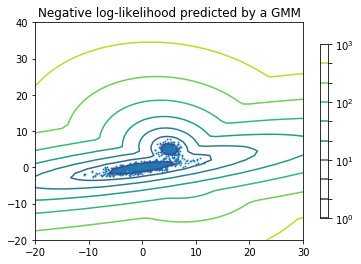

In [0]:
# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -model.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')

plt.scatter(X_train[:, 0], X_train[:, 1], .8)
plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()